In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Memory management
import gc 

In [3]:
#!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
#!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
#!apt-get update -qq 2>&1 > /dev/null
#!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

KeyboardInterrupt: ignored

In [4]:
!mkdir drive
!google-drive-ocamlfuse drive
!ls drive/"Colab Notebooks"

mkdir: cannot create directory ‘drive’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
 all-HCDR
'COLAB HCDR.ipynb'
'Home Credit Default Risk (d66df98a).ipynb'
'Home Credit Default Risk.ipynb'
 log_reg_baseline.csv
 log_reg_corrs_removed_with_bureau.csv
 log_reg_eng.csv
 log_reg_with_bureau.csv
 random_forest_baseline.csv
 random_forest_removed_with_bureau.csv
 random_forest_with_bureau.csv


In [0]:
# Training data
app_train = pd.read_csv('drive/Colab Notebooks/all-HCDR/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
app_test = pd.read_csv('drive/Colab Notebooks/all-HCDR/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

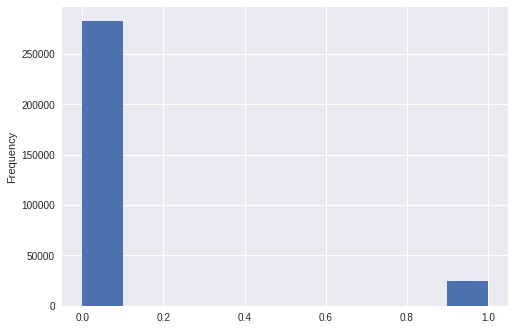

In [0]:
#@title 
app_train['TARGET'].astype(int).plot.hist();

От тази информация лесно може да се направи извод, че имаме небалансиран класификационен проблем. Броят на изплатените на време кредити е доста по-голям от тези, които са имали затруднения с изплащането.


In [0]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

Използваме функцията, която дефинираме, за да намерим в кои колони по колко записи липсват.

In [0]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Броят на липсващите полета е доста голям, така че ще се наложи да заместим празните стойности с данни по някакъв начин. Нека проверим от какви типове данни се състои предоставената ни информация и до каква степен категорните данни са уникални. 

In [0]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [0]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Виждаме, че броят на уникалните записи е сравнително малък, така че ще трябва да измислим начин, по който да се справим с тях. Как ще го направим? Като използваме енкодване или по-точно One Hot Encoding. За всяка колона с категорни данни, тя създава матрица, състояща се от нули и единици, колоните на която представляват стойностите в категорния фийчър. Поради малкия брой уникалности, този тип енкодване не би трябвало да направи данните ни прекалено sparse. От друга странна е малко безсмислено да добавяме допълнителни колони за категорни данни, които имат само по две стойности. Затова ще добавим следното условие: Ако даден фийчър има само две възможни стойности, ще използваме Label Encoding, който просто трансформира данните в числа. Ако има повече от две стойности, тогава използваме One Hot Encoding.

In [0]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [0]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


От получените резултати разбираме, че в тестовите данни се съдържат категорни стойности, които ги няма в тестовите данни. Това означава, че ще трябва да направим сечение на колоните в двете множества, така че да останат еднакъв брой колони в тях. 

In [0]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


# Аномалии

Нека разгледаме данните за аномалии. Това са стойности в данните, които може да са въведени грешно, измерени направилно или просто да са прекалено нестандартни. Ако има такива, то трябва да се справим с тях, защото това ще накара модела да научи шум.

In [0]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Виждаме, че определено има нередности в данните. Максималната стойност в дни се равнява приблизително на 1000 години, което няма как да бъде вярно. Нека да видим разпределението на данните.

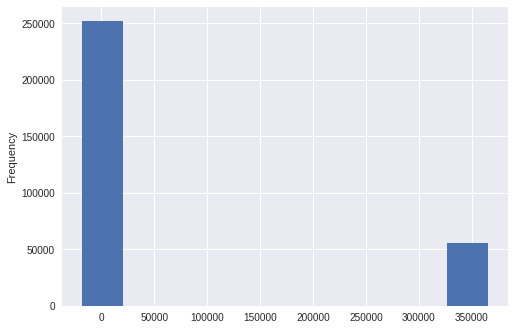

In [0]:
app_train['DAYS_EMPLOYED'].plot.hist()


Виждаме, че голяма част от данните съответстват на максималната стойност. Нека изследваме каква част от тях имат затруднения с изплащането на кредитите.

In [0]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Очевидно има съществена разлика от 3% в полза на аномалните стойности. Може би ще е добре да заменим тези стойности с други, които няма да изместват статистическите показатели на фийчъра, но все пак да останат с еднаква стойност, която да ги отличава от останалите. Можем да добавим допълнителна колата, която да казва на модела дали данните му по този показател са анормални. Нека проверим и други фийчъри за подобни аномалии.

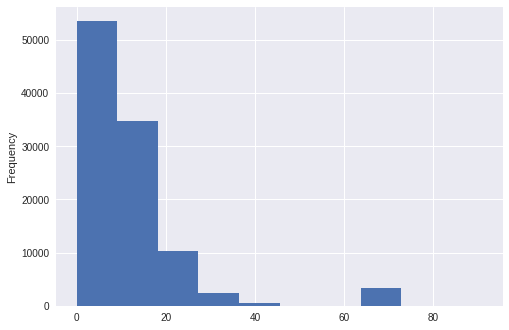

In [0]:
app_train['OWN_CAR_AGE'].plot.hist()

In [0]:
non_have_car = app_train[app_train['OWN_CAR_AGE'] == 0]
have_car = app_train[app_train['OWN_CAR_AGE'] != 0 ]
print('The having cars default on %0.2f%% of loans' % (100 * have_car['TARGET'].mean()))
print('The not having cars default on %0.2f%% of loans' % (100 * non_have_car['TARGET'].mean()))
print('There are %d not having cars.' % len(non_have_car))

The having cars default on 8.08% of loans
The not having cars default on 6.89% of loans
There are 2134 not having cars.


Виждамe, че тези които имат автомобили по-често имат затруднение с изплащането на кредитите. Нека проверим за тези, които имат автомобили, дали възрастта на автомобила има отношение към затрудненията на клиентите да си изплащат кредитите.

In [0]:
100 * app_train[app_train['OWN_CAR_AGE'].isnull()]['TARGET'].mean()

8.500017247411657

In [0]:
100 * app_train[app_train['OWN_CAR_AGE'].notnull() & app_train['OWN_CAR_AGE'] > 0 & (app_train['OWN_CAR_AGE'] < 60)]['TARGET'].mean()

7.251483679525222

In [0]:
100 * app_train[app_train['OWN_CAR_AGE'] == 91]['TARGET'].mean()

50.0

In [0]:
100 * app_train[app_train['OWN_CAR_AGE'] > 60]['TARGET'].mean()

8.385744234800839

In [0]:
app_train['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

Голяма част от данните за възрастта на автомобила на клиентите липсват, така че за сега не можем да "масажираме" данните особено или да съставим други фийчъри от тях. Ще го оставим така. Нека сега добавим фийчър за аномалността на колоната DAYS_EMPLOYED.

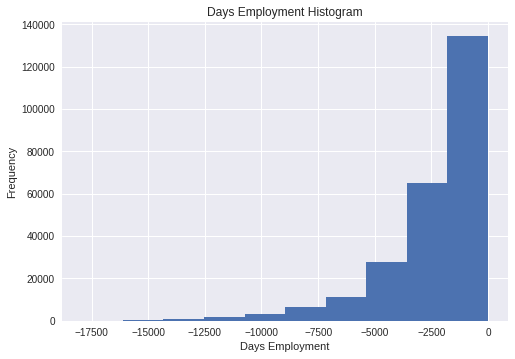

In [0]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [0]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


# Корелации

След като се справихме с категорните данни и аутлайнърите, продължаваме с анализа на данните. За целта може да разгледаме корелацията между данните.

In [0]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Това, което забелязваме, че DAYS_BIRTH и DAYS_EMPLOYED имат положителна корелация с TARGET. Но тъй като TARGET ни е вероятността кандидатът да има затруднения, а стойностите на двете колони са отрицателни, ние трябва да вземем абсолютната им стойност.

In [0]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])
app_train['DAYS_EMPLOYED'].corr(app_train['TARGET'])

-0.07495845742543872

In [0]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

Вече можем да видим, че с увеличаването на възрастта на кандидата и времето, от което работи, рискът да има затруднения с плащанията намалява. Нека разгледаме тези данни малко по-подробно.

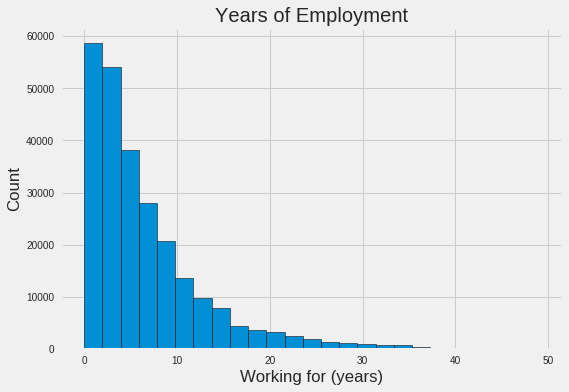

In [0]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of working in years
plt.hist(app_train['DAYS_EMPLOYED'] / 365, edgecolor = 'k', bins = 25)
plt.title('Years of Employment'); plt.xlabel('Working for (years)'); plt.ylabel('Count');

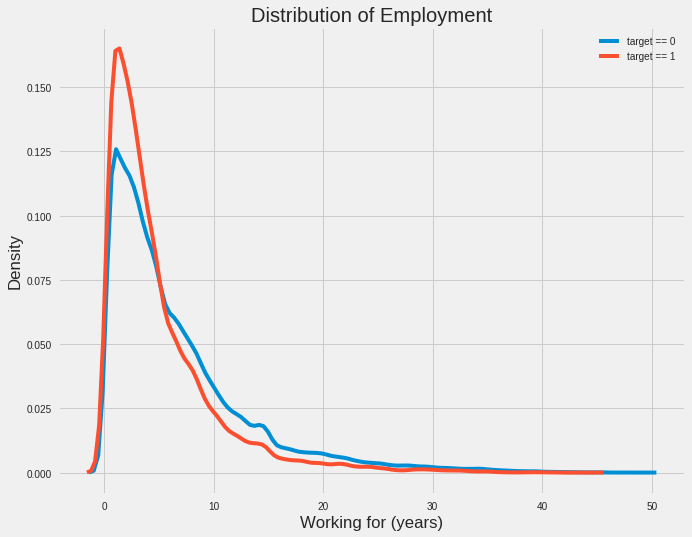

In [0]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Working for (years)'); plt.ylabel('Density'); plt.title('Distribution of Employment');

От разпределението можем да направим извод, че по-голямата част от хората, които са на работа от по-малко от 5 години има затруднения с плащанията. Нека проверим с колко процента се увеличава риска.

In [0]:
# Working information into a separate dataframe
working_data = app_train[['TARGET', 'DAYS_EMPLOYED']]
working_data['YEARS_EMPLOYED'] = working_data['DAYS_EMPLOYED'] / 365

# Bin the age data
working_data['YEARS_BINNED'] = pd.cut(working_data['YEARS_EMPLOYED'], bins = np.linspace(0,50, num=11))
working_data.head(10)

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED,YEARS_BINNED
0,1,637.0,1.745205,"(0.0, 5.0]"
1,0,1188.0,3.254795,"(0.0, 5.0]"
2,0,225.0,0.616438,"(0.0, 5.0]"
3,0,3039.0,8.326027,"(5.0, 10.0]"
4,0,3038.0,8.323288,"(5.0, 10.0]"
5,0,1588.0,4.350685,"(0.0, 5.0]"
6,0,3130.0,8.575342,"(5.0, 10.0]"
7,0,449.0,1.230137,"(0.0, 5.0]"
8,0,NaN,NaN,NaN
9,0,2019.0,5.531507,"(5.0, 10.0]"


In [0]:
working_groups  = working_data.groupby('YEARS_BINNED').mean()
working_groups

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED
YEARS_BINNED,,,
"(0.0, 5.0]",0.105708,864.340763,2.368057
"(5.0, 10.0]",0.073714,2630.224689,7.206095
"(10.0, 15.0]",0.057752,4466.899670,12.238081
"(15.0, 20.0]",0.048484,6306.860448,17.279070
"(20.0, 25.0]",0.047573,8092.875701,22.172262
"(25.0, 30.0]",0.039903,9961.437122,27.291609
"(30.0, 35.0]",0.041258,11791.751418,32.306168
"(35.0, 40.0]",0.019231,13517.634615,37.034615
"(40.0, 45.0]",0.004762,15325.461905,41.987567


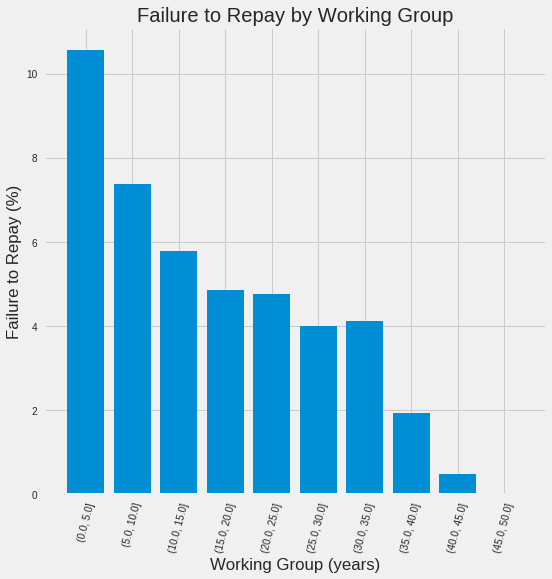

In [0]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(working_groups.index.astype(str), 100 * working_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Working Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Working Group');

Виждаме, че рискът пада с над 5% при кандидатите с трудов стаж над 15 години. Това е интересно и със сигурност ще бъде от полза. Нека да видим как стоят нещата и с възрастта на клиентите.

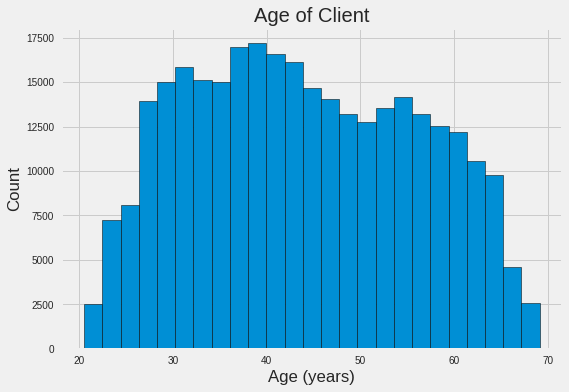

In [0]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

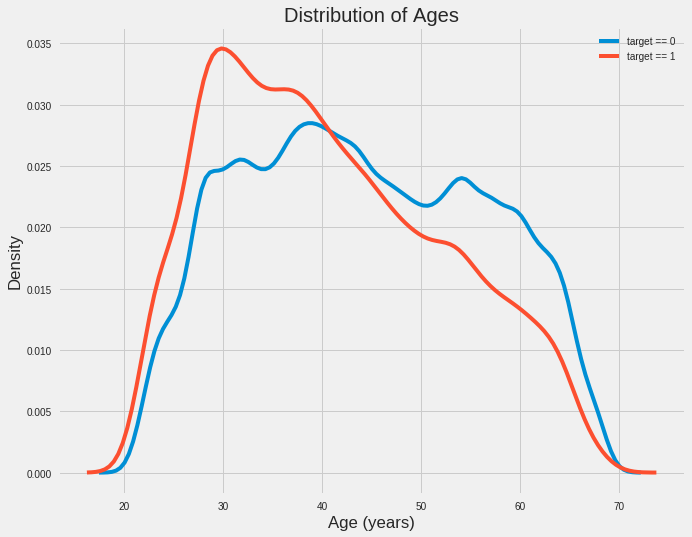

In [0]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [0]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20,70,num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [0]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


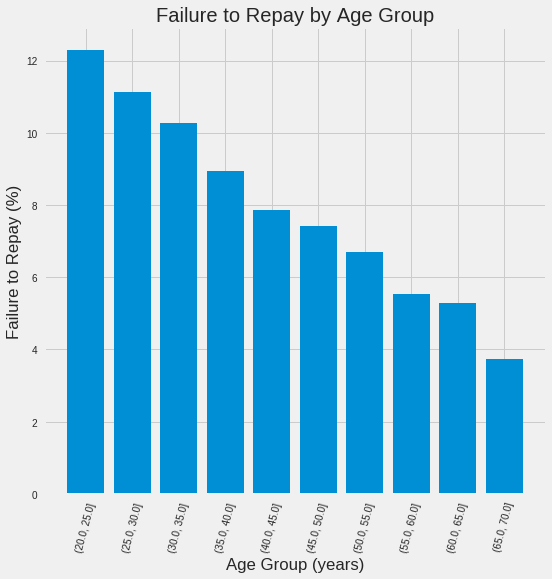

In [0]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Отново виждаме, че рискът намалява значително с увеличаването на възрастта на клиента. От фийчърите с негативна корелация най-висока стойност имат EXT_SOURCE_1, EXT_SOURCE_2 и EXT_SOURCE_3. В документацията пише, че това са нормализирани индекси. Нека визуализираме тяхното разпределение спрямо TARGET.

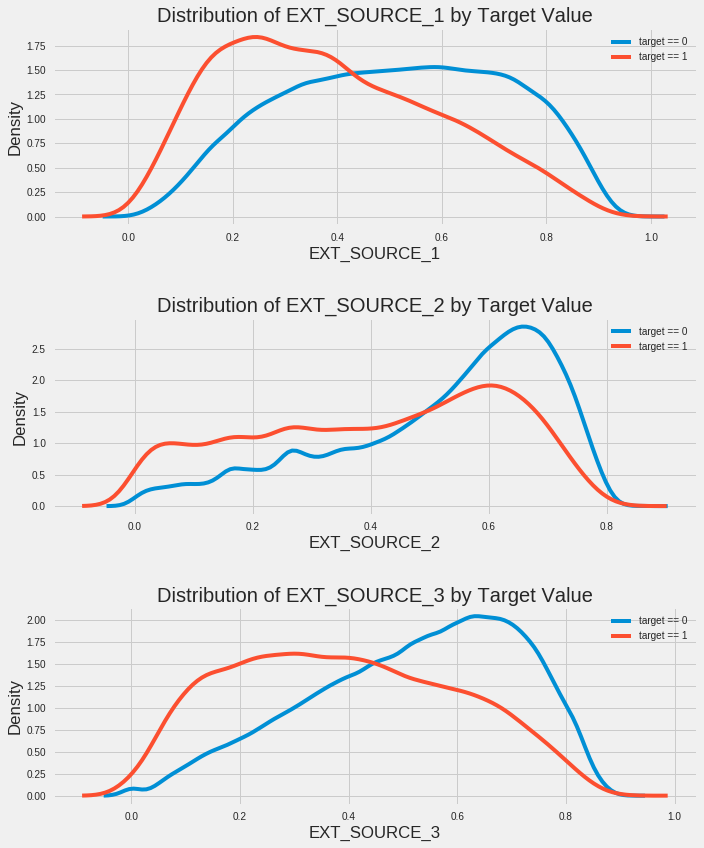

In [0]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

Изводите, които можем да изведем на този етап са, че когато EXT_SOURCE_1 има малка стойност е по-вероятно TARGET = 1,  а когато EXT_SOURCE_3 има голяма стойност и по-вероятно TARGET = 0. 

In [0]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


Нека натренираме Логистична регресия, която ще можем да използва като базов модел.

In [0]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 1)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [0]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.068556
1,100005,0.304368
2,100013,0.062636
3,100028,0.039880
4,100038,0.143876


In [0]:
# Save the submission to a csv file
submit.to_csv('drive/Colab Notebooks/log_reg_baseline.csv', index = False)

Изпращаме събмит файла и получаваме като резултат: 0.72739
Нека сега добавим Feature Engineering като изменим колоните на възраст и стаж на кандидатите.

In [0]:
# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()

    
train['SMALL_WORK_EXP'] = (train['DAYS_EMPLOYED'] < 1825 ).astype(float)
train['BIG_WROK_EXP'] = (train['DAYS_EMPLOYED'] >= 1825 ).astype(float)
train = train.drop('DAYS_EMPLOYED', axis=1)

train['YOUNG'] = (train['DAYS_BIRTH'] < 16425).astype(float)
train['OLD'] = (train['DAYS_BIRTH'] >= 16425).astype(float)
train = train.drop('DAYS_BIRTH', axis=1)

train = train.drop('DAYS_ID_PUBLISH', axis=1)
train = train.drop('SK_ID_CURR', axis=1)
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

test['SMALL_WORK_EXP'] = (test['DAYS_EMPLOYED'] < 1825 ).astype(float)
test['BIG_WROK_EXP'] = (test['DAYS_EMPLOYED'] >= 1825 ).astype(float)
test = test.drop('DAYS_EMPLOYED', axis=1)

test['YOUNG'] = (test['DAYS_BIRTH'] < 16425).astype(float)
test['OLD'] = (test['DAYS_BIRTH'] >= 16425).astype(float)
test = test.drop('DAYS_BIRTH', axis=1)

test = test.drop('DAYS_ID_PUBLISH', axis=1)
test = test.drop('SK_ID_CURR', axis=1)

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [0]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 1)

# Train on the training data
log_reg.fit(train, train_labels)

In [0]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

In [0]:
# Save the submission to a csv file
submit.to_csv('drive/Colab Notebooks/log_reg_eng.csv', index = False)

Върнатият ни резултат е: 0.73501! Имаме подобрение. Нека се опитаме да натренираме по-сложен модел - например Random FOrest


In [0]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [0]:
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

In [0]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('drive/Colab Notebooks/random_forest_baseline.csv', index = False)

Върнатият ни резултат е: 0.68623. За сега Логистичната регресия се справя по-добре. Нека проверим кои фийчъри са оценени като най-важни.

In [0]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [0]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

Нека натренираме и един kNN, за да видим той как ще се справи.



```
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
neigh.fit(train, train_labels)
# Make predictions on the test data
kNNpredictions = neigh.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = kNNpredictions

# Save the submission dataframe
submit.to_csv('drive/Colab Notebooks/kNN_eng.csv', index = False)
```



Не успяваме да изпълним тренирането на модела, дори и срещу средата предоставена от Google... 
Нека опитаме с Support Vector Machine. Особеното при него е, че ако искаме да ни върне вероятности за примерите, това се прави с петорна кросвалидация и има отклонения от реалните стойности. Това изключително повишава времето за изпълнение. Нека да опитаме.



```
from sklearn.svm import SVC
clf = SVC(gamma='auto',probability=True)
clf.fit(train, train_labels)
# Make predictions on the test data
SVMpredictions = clf.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = SVMpredictions

# Save the submission dataframe
submit.to_csv('drive/Colab Notebooks/svm_eng.csv', index = False)
```



Отново не успяваме да натренираме модела.... 

Нека добавим други таблици, които да анализираме, а след това ще натренираме модел, използващ и тяхната информация. Това ще са таблиците bureau и bureau_balance.

bereau: Информация за предишни кредити на клиента, предоставени му от други финансови институции

bereau_balance: Месечна информация относно минали заеми, съдържаща запис за все месец.

In [0]:
bureau = pd.read_csv('drive/Colab Notebooks/all-HCDR/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Нека изведем информация за броя активни и приключени кредити за всеки от текущите кандидати.

In [0]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.sort_values('previous_loan_counts',ascending=False).head()

,SK_ID_CURR,previous_loan_counts
17942,120860,116
59911,169704,94
187259,318065,78
130327,251643,61
279405,425396,60


In [0]:
previous_loan_active_counts = bureau[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_active_counts'})
previous_loan_active_counts.sort_values('previous_loan_active_counts', ascending=False).head()

,SK_ID_CURR,previous_loan_active_counts
161997,329272,32
191794,371490,22
35770,150685,22
32398,145911,20
214786,404089,19


In [0]:
previous_loan_closed_counts = bureau[bureau['CREDIT_ACTIVE'] == 'Closed'].groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_closed_counts'})
previous_loan_closed_counts.sort_values('previous_loan_closed_counts', ascending=False).head()

,SK_ID_CURR,previous_loan_closed_counts
15696,120860,108
52526,169704,84
164053,318065,66
244850,425396,58
147353,295809,56


In [0]:
# Join to the training dataframe
app_train = app_train.merge(previous_loan_active_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(previous_loan_closed_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
app_train['previous_loan_active_counts'] = app_train['previous_loan_active_counts'].fillna(0)
app_train['previous_load_closed_counts'] = app_train['previous_loan_active_counts'].fillna(0)
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,previous_loan_active_counts,previous_loan_closed_counts,previous_load_closed_counts
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,1,0,1,0,1,False,2.0,6.0,2.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,1,0,0,False,1.0,3.0,1.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,False,0.0,2.0,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,False,0.0,NaN,0.0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,False,0.0,1.0,0.0


In [0]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)
    

The correlation between previous_loan_active_counts and the TARGET is 0.0436
Median value for loan that was not repaid = 2.0000
Median value for loan that was repaid =     1.0000


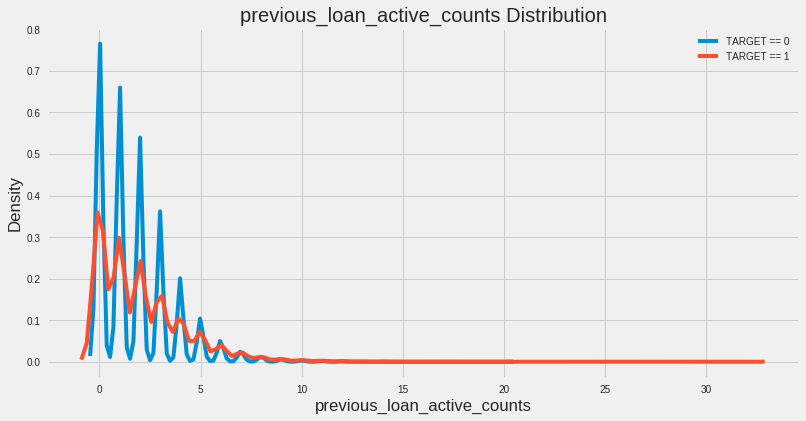

In [0]:
kde_target('previous_loan_active_counts', app_train)

The correlation between previous_loan_closed_counts and the TARGET is -0.0145
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid =     3.0000


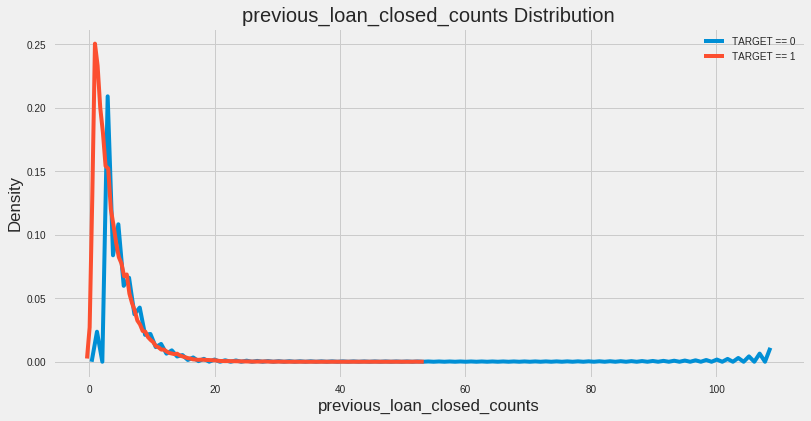

In [0]:
kde_target('previous_loan_closed_counts', app_train)

На базата на тези разпределения единственото, което можеш да изведем като извод е, че хора, които нямат кредитно минало имат малко по-голяма вероятност да имат затруднения, както и тези които към момента имат повече от 1 активен заем към момента. Но корелацията с TARGET е пренебрежимо малка, така че за сега оставяме нещата така. Нека изведем статистически данни и за другите полета от таблицата като средно, максимално, минимално и сума.

In [0]:
# Group by the client id, calculate aggregation statistics
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                 ...    DAYS_CREDIT_UPDATE                               \
  mean max min   ...                 count        mean  max   min   sum   
0  0.0   0   0   ...                     7  -93.142857   -6  -155  -652   
1  0.0   0   0   ...                     8 -499.875000   -7 -1185 -3999   
2  0.0   0   0   ...                     4 -816.000000  -43 -2131 -3264   
3  0.0   0   0   ...                     2 -532.000000 -382  -682 -1064   
4  0.0   0   0   ...                     3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [0]:
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [0]:
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


Прибавяме новите колони към тренировъчните ни данни.

In [0]:
# Merge with the training data
app_train = app_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.0


Нека проверим корелацията на новите фийчъри с TARGET колоната

In [0]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = app_train['TARGET'].corr(app_train[col])
    
    # Append the list as a tuple

    new_corrs.append((col, corr))

In [0]:
# Sort the correlations by the absolute value
# Make sure to reverse to put the largest values at the front of list
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998114),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968673),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392077),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.0537348956010205),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758616),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997299),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.048853502611115894),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.046982754334835494),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730155),
 ('bureau_DAYS_CREDIT_sum', 0.041999824814846716),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306002),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329094),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921616024),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325495)]

Няма значително големи корелации нито един от създадените от нас фийчъри. Нека все пак видим разпределението на bureau_DAYS_CREDIT_mean спрямо TARGET какво е.

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid =     -1067.0000


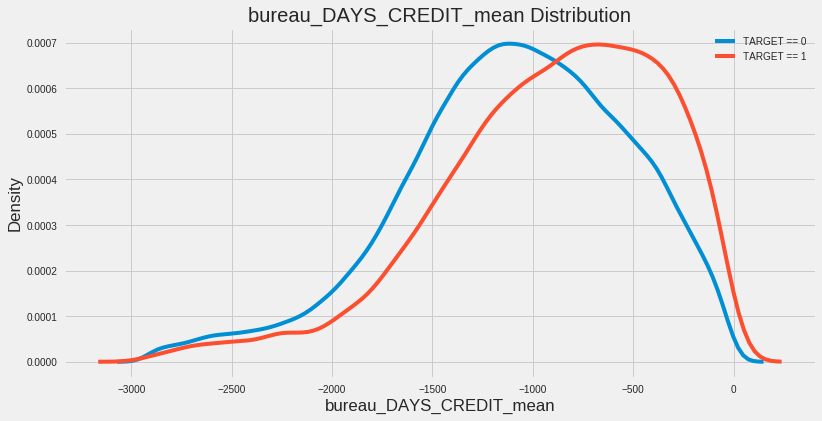

In [0]:
kde_target('bureau_DAYS_CREDIT_mean', app_train)

Виждаме, че тези които са кандидатствали за предишен кредит по-отдавна спрямо сегашното кандидатстване имат по-добри шансове да си върнат кредита, но разликата не е достатъчно голяма, за да разглеждаме това по-подробно за момента. 

In [0]:
def agg_numeric(df, group_var, df_name):
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [0]:
# Function to calculate correlations with the target for a dataframe
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

Нека сега преминем към категорните стойности в таблицата. 

In [0]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354


In [0]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                            sum      mean                    sum mean   
SK_ID_CURR                                                              
100001                        3  0.428571                      0  0.0   
100002                        2  0.250000                      0  0.0   
100003                        1  0.250000                      0  0.0   
100004                        0  0.000000                      0  0.0   
100005                        2  0.666667                      0  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                            sum      mean                sum mean   
SK_ID_CURR                                                          
100001                        4  0.571429                  0  0.0   
100002                        6  0.750000                  0  0.0   
100003                        3  0.750000                  0  0.0   
100004                        2  1.000000                  0  0.0   
100005                        1  0.333333                  0  0.0   

           CREDIT_CURRENCY_currency 1      ...  CREDIT_TYPE_Microloan       \
                                  sum mean ...                    sum mean   
SK_ID_CURR                                 ...                               
100001                              7  1.0 ...                      0  0.0   
100002                              8  1.0 ...                      0  0.0   
100003                              4  1.0 ...                      0  0.0   
100004                              2  1.0 ...                      0  0.0   
100005                              3  1.0 ...                      0  0.0   

           CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0  0.0                    0  0.0   
100002                                    0  0.0                    0  0.0   
100003                                    0  0.0                    0  0.0   
100004                                    0  0.0                    0  0.0   
100005                                    0  0.0                    0  0.0   

           CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan  \
                                    sum mean                              sum   
SK_ID_CURR                                                                      
100001                                0  0.0                                0   
100002                                0  0.0                                0   
100003                                0  0.0                                0   
100004                                0  0.0                                0   
100005                                0  0.0                                0   

                 
           mean  
SK_ID_CURR       
100001      0.0  
100002      0.0  
100003      0.0  
100004      0.0  
100005      0.0  

[5 rows x 46 columns]

In [0]:
group_var = 'SK_ID_CURR'

# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

,CREDIT_ACTIVE_Active_count,CREDIT_ACTIVE_Active_count_norm,CREDIT_ACTIVE_Bad debt_count,CREDIT_ACTIVE_Bad debt_count_norm,CREDIT_ACTIVE_Closed_count,CREDIT_ACTIVE_Closed_count_norm,CREDIT_ACTIVE_Sold_count,CREDIT_ACTIVE_Sold_count_norm,CREDIT_CURRENCY_currency 1_count,CREDIT_CURRENCY_currency 1_count_norm,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [0]:
app_train = app_train.merge(categorical_grouped, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
def count_categorical(df, group_var, df_name):
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    return categorical

In [0]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


Продължаваме с другата таблица bureau_balance.

In [0]:
# Read in bureau balance
bureau_balance = pd.read_csv('drive/Colab Notebooks/all-HCDR/bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [0]:
# Counts of each type of status for each previous loan
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [0]:
# Calculate value count statistics for each `SK_ID_CURR` 
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


Статистиките, които изваждаме са за даден кредит, но ние трябва да ги групираме за клиент, за да може да ги добавим към транировъчните ти данни.

In [0]:
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_BUREAU', how = 'left')

bureau_by_loan.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,...,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm,SK_ID_CURR
0,5001709,97,-48.0,0,-96,-4656,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402,NaN
1,5001710,83,-41.0,0,-82,-3403,5,0.060241,0,0.0,...,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446,162368.0
2,5001711,4,-1.5,0,-3,-6,3,0.750000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000,162368.0
3,5001712,19,-9.0,0,-18,-171,10,0.526316,0,0.0,...,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000,162368.0
4,5001713,22,-10.5,0,-21,-231,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000,150635.0


In [0]:
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')
bureau_balance_by_client.head()

,SK_ID_CURR,client_bureau_balance_MONTHS_BALANCE_count_count,client_bureau_balance_MONTHS_BALANCE_count_mean,client_bureau_balance_MONTHS_BALANCE_count_max,client_bureau_balance_MONTHS_BALANCE_count_min,client_bureau_balance_MONTHS_BALANCE_count_sum,client_bureau_balance_MONTHS_BALANCE_mean_count,client_bureau_balance_MONTHS_BALANCE_mean_mean,client_bureau_balance_MONTHS_BALANCE_mean_max,client_bureau_balance_MONTHS_BALANCE_mean_min,...,client_bureau_balance_STATUS_X_count_count,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_max,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_sum,client_bureau_balance_STATUS_X_count_norm_count,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min,client_bureau_balance_STATUS_X_count_norm_sum
0,100001.0,7,24.571429,52,2,172,7,-11.785714,-0.5,-25.5,...,7,4.285714,9,0,30.0,7,0.214590,0.500000,0.0,1.502129
1,100002.0,8,13.750000,22,4,110,8,-21.875000,-1.5,-39.5,...,8,1.875000,3,0,15.0,8,0.161932,0.500000,0.0,1.295455
2,100005.0,3,7.000000,13,3,21,3,-3.000000,-1.0,-6.0,...,3,0.666667,1,0,2.0,3,0.136752,0.333333,0.0,0.410256
3,100010.0,2,36.000000,36,36,72,2,-46.000000,-19.5,-72.5,...,2,0.000000,0,0,0.0,2,0.000000,0.000000,0.0,0.000000
4,100013.0,4,57.500000,69,40,230,4,-28.250000,-19.5,-34.0,...,4,10.250000,40,0,41.0,4,0.254545,1.000000,0.0,1.018182


Нека сега заредим данните отново, като приложим всички трансформации и да видим какъв резултат ще получим.

In [0]:
train = pd.read_csv('drive/Colab Notebooks/all-HCDR/application_train.csv')
bureau = pd.read_csv('drive/Colab Notebooks/all-HCDR/bureau.csv')
bureau_balance = pd.read_csv('drive/Colab Notebooks/all-HCDR/bureau_balance.csv')

In [0]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')

In [0]:
bureau_counts.reset_index(level=0, inplace=True)
bureau_counts.head()

,SK_ID_CURR,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
0,100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [0]:
train = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [0]:
new_features = list(train.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

Number of features using previous loans from other institutions data:  333


In [0]:
def feature_engineer_applications(applications):
  result = applications
  
  result['DAYS_EMPLOYED_ANOM'] = result["DAYS_EMPLOYED"] == 365243
  result['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
  result['DAYS_EMPLOYED'] = abs(result['DAYS_EMPLOYED'])
  result['DAYS_BIRTH'] = abs(result['DAYS_BIRTH'])
  result['YEARS_EMPLOYED'] = result['DAYS_EMPLOYED']/365
  result['YEARS_BIRTH'] = result['DAYS_BIRTH']/365
  result['SMALL_WORK_EXP'] = (result['DAYS_EMPLOYED'] < 1825 ).astype(float)
  result['BIG_WROK_EXP'] = (result['DAYS_EMPLOYED'] >= 1825 ).astype(float)
  result = result.drop('DAYS_EMPLOYED', axis=1)
  result['YOUNG'] = (result['DAYS_BIRTH'] < 16425).astype(float)
  result['OLD'] = (result['DAYS_BIRTH'] >= 16425).astype(float)
  result = result.drop('YEARS_BIRTH', axis=1)
  result = result.drop('DAYS_ID_PUBLISH', axis=1)

  
  return result


  

In [0]:
train = feature_engineer_applications(train)

In [0]:
test = pd.read_csv('drive/Colab Notebooks/all-HCDR/application_test.csv')
test = test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
test = feature_engineer_applications(test)

In [0]:
print('Shape of Testing Data: ', test.shape)

Shape of Testing Data:  (48744, 336)


In [0]:
train_labels = train['TARGET']

# Align the dataframes, this will remove the 'TARGET' column
train, test = train.align(test, join = 'inner', axis = 1)

train['TARGET'] = train_labels
print('Training Data Shape: ', train.shape)
print('Testing Data Shape: ', test.shape)

Training Data Shape:  (307511, 337)
Testing Data Shape:  (48744, 336)


Запазваме обработените train и test данни като файлове, за да можем да работим с тях наготово.

In [0]:
train.to_csv('drive/Colab Notebooks/all-HCDR/train_bureau_raw.csv', index = False)
test.to_csv('drive/Colab Notebooks/all-HCDR/test_bureau_raw.csv', index = False)

In [0]:
# Calculate all correlations in dataframe
corrs = train.corr()

In [0]:
corrs = corrs.sort_values('TARGET', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

,TARGET
TARGET,1.000000
bureau_DAYS_CREDIT_mean,0.089729
client_bureau_balance_MONTHS_BALANCE_min_mean,0.089038
SMALL_WORK_EXP,0.081807
bureau_CREDIT_ACTIVE_Active_count_norm,0.077356
client_bureau_balance_MONTHS_BALANCE_mean_mean,0.076424
bureau_DAYS_CREDIT_min,0.075248
client_bureau_balance_MONTHS_BALANCE_min_min,0.073225
client_bureau_balance_MONTHS_BALANCE_sum_mean,0.072606
bureau_DAYS_CREDIT_UPDATE_mean,0.068927


In [0]:
pd.DataFrame(corrs['TARGET'].dropna().tail(10))

,TARGET
client_bureau_balance_STATUS_C_count_mean,-0.062954
OLD,-0.064165
client_bureau_balance_MONTHS_BALANCE_count_max,-0.068792
YEARS_EMPLOYED,-0.074958
DAYS_BIRTH,-0.078239
bureau_CREDIT_ACTIVE_Closed_count_norm,-0.079369
client_bureau_balance_MONTHS_BALANCE_count_mean,-0.080193
EXT_SOURCE_1,-0.155317
EXT_SOURCE_2,-0.160472
EXT_SOURCE_3,-0.178919


In [0]:
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [0]:
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  135


In [0]:
train_corrs_removed = train.drop(columns = cols_to_remove)
test_corrs_removed = test.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 202)
Testing Corrs Removed Shape:  (48744, 201)


In [0]:
train_corrs_removed.to_csv('drive/Colab Notebooks/all-HCDR/train_bureau_corrs_removed.csv', index = False)
test_corrs_removed.to_csv('drive/Colab Notebooks/all-HCDR/test_bureau_corrs_removed.csv', index = False)

NameError: ignored

Нека сега натренираме модели върху обработените данни, първо с всички фийчъри, а след това с тези, където премахнахме колоните с висока корелация помежду им.

In [0]:
train = pd.read_csv('drive/Colab Notebooks/all-HCDR/train_bureau_raw.csv')
test = pd.read_csv('drive/Colab Notebooks/all-HCDR/test_bureau_raw.csv')

In [0]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min,client_bureau_balance_STATUS_X_count_norm_sum,DAYS_EMPLOYED_ANOM,YEARS_EMPLOYED,SMALL_WORK_EXP,BIG_WROK_EXP,YOUNG,OLD,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.5,0.0,1.295455,False,1.745205,1.0,0.0,1.0,0.0,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,0.000000,False,3.254795,1.0,0.0,0.0,1.0,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,0.000000,False,0.616438,1.0,0.0,0.0,1.0,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,False,8.326027,0.0,1.0,0.0,1.0,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,0.000000,False,8.323288,0.0,1.0,0.0,1.0,0


In [0]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [0]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 458)
Testing Features shape:  (48744, 454)


In [0]:
train_labels = train['TARGET']

# Align the dataframes, this will remove the 'TARGET' column
train, test = train.align(test, join = 'inner', axis = 1)

train['TARGET'] = train_labels
print('Training Data Shape: ', train.shape)
print('Testing Data Shape: ', test.shape)

Training Data Shape:  (307511, 455)
Testing Data Shape:  (48744, 454)


In [0]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in train:
    all_train = train.drop(columns = ['TARGET'])
else:
    all_train = train.copy()
    
# Feature names
features = list(all_train.columns)

# Copy of the testing data
all_test = test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(all_train)

# Transform both training and testing data
all_train = imputer.transform(all_train)
all_test = imputer.transform(all_test)

# Repeat with the scaler
scaler.fit(all_train)
all_train = scaler.transform(all_train)
all_test = scaler.transform(all_test)

print('Training data shape: ', all_train.shape)
print('Testing data shape: ', all_test.shape)

KeyboardInterrupt: ignored

In [0]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 1)

# Train on the training data
log_reg.fit(all_train, train_labels)

log_reg_pred = log_reg.predict_proba(all_test)[:, 1]


In [0]:
# Submission dataframe
submit = test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.041656
1,100005,0.175238
2,100013,0.026464
3,100028,0.030546
4,100038,0.146259


In [0]:

# Save the submission to a csv file
submit.to_csv('drive/Colab Notebooks/log_reg_with_bureau.csv', index = False)

Върнатият ни резултат е: 0.74696! Нека проверим какъв резултат ще имаме и с премахнатите корелации.

In [0]:
train_corrs_removed = pd.read_csv('drive/Colab Notebooks/all-HCDR/train_bureau_corrs_removed.csv')
test_corrs_removed= pd.read_csv('drive/Colab Notebooks/all-HCDR/test_bureau_corrs_removed.csv')

In [0]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_corrs_removed:
    if train_corrs_removed[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_corrs_removed[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_corrs_removed[col])
            # Transform both training and testing data
            train_corrs_removed[col] = le.transform(train_corrs_removed[col])
            test_corrs_removed[col] = le.transform(test_corrs_removed[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [0]:
# one-hot encoding of categorical variables
train_corrs_removed = pd.get_dummies(train_corrs_removed)
test_corrs_removed = pd.get_dummies(test_corrs_removed)

print('Training Features shape: ', train_corrs_removed.shape)
print('Testing Features shape: ', test_corrs_removed.shape)

Training Features shape:  (307511, 323)
Testing Features shape:  (48744, 319)


In [0]:
train_labels = train_corrs_removed['TARGET']

# Align the dataframes, this will remove the 'TARGET' column
train_corrs_removed, test_corrs_removed = train_corrs_removed.align(test_corrs_removed, join = 'inner', axis = 1)

train_corrs_removed['TARGET'] = train_labels
print('Training Data Shape: ', train_corrs_removed.shape)
print('Testing Data Shape: ', test_corrs_removed.shape)

Training Data Shape:  (307511, 320)
Testing Data Shape:  (48744, 319)


In [0]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in train_corrs_removed:
    all_train_corrs_removed = train_corrs_removed.drop(columns = ['TARGET'])
else:
    all_train_corrs_removed = train_corrs_removed.copy()
    
# Feature names
features = list(all_train_corrs_removed.columns)

# Copy of the testing data
all_test_corrs_removed = test_corrs_removed.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(all_train_corrs_removed)

# Transform both training and testing data
all_train_corrs_removed = imputer.transform(all_train_corrs_removed)
all_test_corrs_removed = imputer.transform(all_test_corrs_removed)

# Repeat with the scaler
scaler.fit(all_train_corrs_removed)
all_train_corrs_removed = scaler.transform(all_train_corrs_removed)
all_test_corrs_removed = scaler.transform(all_test_corrs_removed)

print('Training data shape: ', all_train_corrs_removed.shape)
print('Testing data shape: ', all_test_corrs_removed.shape)

Training data shape:  (307511, 319)
Testing data shape:  (48744, 319)


In [0]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 1)

# Train on the training data
log_reg.fit(all_train_corrs_removed, train_labels)

log_reg_pred = log_reg.predict_proba(all_test_corrs_removed)[:, 1]

In [0]:
# Submission dataframe
submit = test_corrs_removed[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.042024
1,100005,0.177092
2,100013,0.023849
3,100028,0.044017
4,100038,0.158970


In [0]:

# Save the submission to a csv file
submit.to_csv('drive/Colab Notebooks/log_reg_corrs_removed_with_bureau.csv', index = False)

Полученият резултат е: 0.74401. Явно премахнатите фийчъри помагат да модела повече отколкото вредят. Нека натренираме и Random Forest, за да можем да съпоставим кой модел се справя по-добре.

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

random_forest.fit(all_train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [0]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(all_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.1s finished


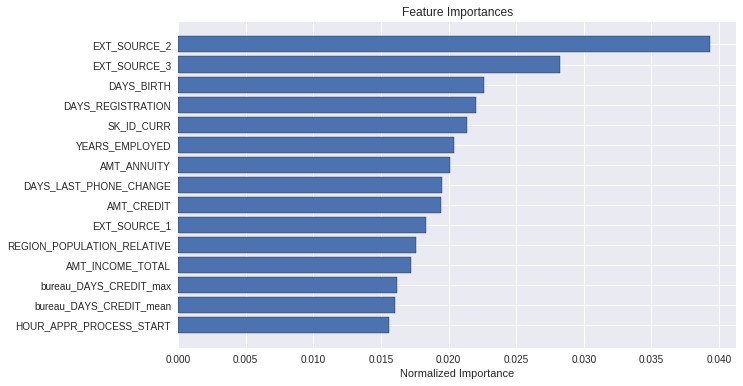

In [0]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

Виждаме, че някои от фийчърите, които сме създали се нареждат сред най-важните за работата на алгоритъма.

In [0]:

submit = test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('drive/Colab Notebooks/random_forest_with_bureau.csv', index = False)

Резултатът е: 0.69782! Продължава да не се справя добре. Може би Логистичната регресия остава най-добрия вариант. Нека все пак да видим, ако направим другия тест какъв резултат ще получим.

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

random_forest.fit(all_train_corrs_removed, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [0]:
# Make predictions on the test data
predictions = random_forest.predict_proba(all_test_corrs_removed)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.0s finished


In [0]:

submit = test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('drive/Colab Notebooks/random_forest_removed_with_bureau.csv', index = False)

Полученият резултат е: 0.70131! При Random Forest премахването на някои полета, които имат голяма корелация с други, явно дава положителен резултат. Все пак този модел изостава значително пред Логистичната регресия. Нека добавим и останалите таблици и да видим какви резултати ще получим.

In [0]:
import sys

def return_size(df):
    """Return size of dataframe in gigabytes"""
    return round(sys.getsizeof(df) / 1e9, 2)

def convert_types(df, print_info = False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df

Тази функция ни трябва, защото паметта, предоставена ни от Google Colab неочаквано свършва и ни крашва notebook-a.

In [0]:
previous = pd.read_csv('drive/Colab Notebooks/all-HCDR/previous_application.csv')
previous = convert_types(previous)
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Calculate aggregate statistics for each numeric column
previous_agg = agg_numeric(previous, 'SK_ID_CURR', 'previous')
print('Previous aggregation shape: ', previous_agg.shape)
previous_agg.head()

Previous aggregation shape:  (338857, 91)


,SK_ID_CURR,previous_AMT_ANNUITY_count,previous_AMT_ANNUITY_mean,previous_AMT_ANNUITY_max,previous_AMT_ANNUITY_min,previous_AMT_ANNUITY_sum,previous_AMT_APPLICATION_count,previous_AMT_APPLICATION_mean,previous_AMT_APPLICATION_max,previous_AMT_APPLICATION_min,...,previous_DAYS_TERMINATION_count,previous_DAYS_TERMINATION_mean,previous_DAYS_TERMINATION_max,previous_DAYS_TERMINATION_min,previous_DAYS_TERMINATION_sum,previous_NFLAG_INSURED_ON_APPROVAL_count,previous_NFLAG_INSURED_ON_APPROVAL_mean,previous_NFLAG_INSURED_ON_APPROVAL_max,previous_NFLAG_INSURED_ON_APPROVAL_min,previous_NFLAG_INSURED_ON_APPROVAL_sum
0,100001,1,3951.000000,3951.000000,3951.000000,3951.000000,1,24835.50,24835.5,24835.5,...,1,-1612.000000,-1612.0,-1612.0,-1612.0,1,0.000000,0.0,0.0,0.0
1,100002,1,9251.775391,9251.775391,9251.775391,9251.775391,1,179055.00,179055.0,179055.0,...,1,-17.000000,-17.0,-17.0,-17.0,1,0.000000,0.0,0.0,0.0
2,100003,3,56553.988281,98356.992188,6737.310059,169661.968750,3,435436.50,900000.0,68809.5,...,3,-1047.333374,-527.0,-1976.0,-3142.0,3,0.666667,1.0,0.0,2.0
3,100004,1,5357.250000,5357.250000,5357.250000,5357.250000,1,24282.00,24282.0,24282.0,...,1,-714.000000,-714.0,-714.0,-714.0,1,0.000000,0.0,0.0,0.0
4,100005,1,4813.200195,4813.200195,4813.200195,4813.200195,2,22308.75,44617.5,0.0,...,1,-460.000000,-460.0,-460.0,-460.0,1,0.000000,0.0,0.0,0.0


In [0]:
def agg_categorical(df, parent_var, df_name):
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[parent_var] = df[parent_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum', 'count', 'mean']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical

In [0]:
# Calculate value counts for each categorical column
previous_counts = agg_categorical(previous, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', previous_counts.shape)
previous_counts.head()

Previous counts shape:  (338857, 285)


,previous_NAME_GOODS_CATEGORY_Animals_mean,previous_NAME_GOODS_CATEGORY_Animals_sum,previous_NAME_GOODS_CATEGORY_House Construction_mean,previous_NAME_GOODS_CATEGORY_House Construction_sum,previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_mean,previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_sum,previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean,previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_sum,previous_NAME_CASH_LOAN_PURPOSE_Hobby_mean,previous_NAME_CASH_LOAN_PURPOSE_Hobby_sum,...,previous_CODE_REJECT_REASON_XAP_mean,previous_FLAG_LAST_APPL_PER_CONTRACT_Y_mean,previous_NAME_PORTFOLIO_POS_sum,previous_NAME_CONTRACT_TYPE_Consumer loans_sum,previous_NAME_CASH_LOAN_PURPOSE_XAP_sum,previous_NAME_PRODUCT_TYPE_XNA_sum,previous_NAME_CONTRACT_STATUS_Approved_sum,previous_CODE_REJECT_REASON_XAP_sum,previous_FLAG_LAST_APPL_PER_CONTRACT_Y_sum,previous_NAME_CONTRACT_TYPE_Cash loans_count
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,1,1,1,1,1
100002,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,1,1,1,1,1
100003,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,2,2,2,2,3,3,3,3
100004,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,1,1,1,1,1
100005,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,2,1,2,2,2


In [0]:
previous_counts.reset_index(level=0, inplace=True)

In [0]:
# Merge in the previous information
train = train.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
train = train.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

test = test.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
test = test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

Нека дефинираме функция, с която ще премахнем всички фийчъри, които имат повече зададен процент липсващи стойности.

In [0]:
def remove_missing_columns(train, test, threshold = 90):
    # Calculate missing stats for train and test (remember to calculate a percent!)
    train_miss = pd.DataFrame(train.isnull().sum())
    train_miss['percent'] = 100 * train_miss[0] / len(train)
    
    test_miss = pd.DataFrame(test.isnull().sum())
    test_miss['percent'] = 100 * test_miss[0] / len(test)
    
    # list of missing columns for train and test
    missing_train_columns = list(train_miss.index[train_miss['percent'] > threshold])
    missing_test_columns = list(test_miss.index[test_miss['percent'] > threshold])
    
    # Combine the two lists together
    missing_columns = list(set(missing_train_columns + missing_test_columns))
    
    # Print information
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_columns), threshold))
    
    # Drop the missing columns and return
    train = train.drop(columns = missing_columns)
    test = test.drop(columns = missing_columns)
    
    return train, test

In [0]:
train, test = remove_missing_columns(train, test)

There are 6 columns with greater than 90% missing values.


Ще дефинираме функция, с която можем да агрегираме данните към клиент, така че да ни е по-удобно да обработваме останалите таблици.

In [0]:
def aggregate_client(df, group_vars, df_names):
    
    # Aggregate the numeric columns
    df_agg = agg_numeric(df, group_var = group_vars[0], df_name = df_names[0])
    
    # If there are categorical variables
    if any(df.dtypes == 'category'):
    
        # Count the categorical columns
        df_counts = agg_categorical(df, parent_var = group_vars[0], df_name = df_names[0])
        df_counts.reset_index(level=0, inplace=True)
        
        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var = group_vars[1], df_name = df_names[1])

        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')
        
        gc.enable()
        del df_agg
        gc.collect()
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var = group_vars[1], df_name = df_names[1])
        
    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client


In [0]:
train.to_csv('drive/Colab Notebooks/all-HCDR/train_applications_bureau_previous.csv')

In [0]:
test.to_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous.csv')

Тук Google Colab започна непрекъснато да чупи сесията, поради огромното използване на RAM памет, затова ще се опитваме на малки стъпки да добавяме данни и да ги записваме отново в файлове.

In [0]:
train = pd.read_csv('drive/Colab Notebooks/all-HCDR/train_applications_bureau_previous.csv')
test = pd.read_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous.csv')

In [0]:
cash = pd.read_csv('drive/Colab Notebooks/all-HCDR/POS_CASH_balance.csv')
cash = convert_types(cash)
cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [0]:
cash_by_client = aggregate_client(cash, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['cash', 'client'])
cash_by_client.head()

,SK_ID_CURR,client_cash_NAME_CONTRACT_STATUS_XNA_mean_count,client_cash_NAME_CONTRACT_STATUS_XNA_mean_mean,client_cash_NAME_CONTRACT_STATUS_XNA_mean_max,client_cash_NAME_CONTRACT_STATUS_XNA_mean_min,client_cash_NAME_CONTRACT_STATUS_XNA_mean_sum,client_cash_NAME_CONTRACT_STATUS_XNA_sum_count,client_cash_NAME_CONTRACT_STATUS_XNA_sum_mean,client_cash_NAME_CONTRACT_STATUS_XNA_sum_max,client_cash_NAME_CONTRACT_STATUS_XNA_sum_min,...,client_cash_SK_DPD_DEF_min_count,client_cash_SK_DPD_DEF_min_mean,client_cash_SK_DPD_DEF_min_max,client_cash_SK_DPD_DEF_min_min,client_cash_SK_DPD_DEF_min_sum,client_cash_SK_DPD_DEF_sum_count,client_cash_SK_DPD_DEF_sum_mean,client_cash_SK_DPD_DEF_sum_max,client_cash_SK_DPD_DEF_sum_min,client_cash_SK_DPD_DEF_sum_sum
0,100001,9,0.0,0.0,0.0,0.0,9,0.0,0,0,...,9,0.0,0,0,0,9,3.111111,7,0,28
1,100002,19,0.0,0.0,0.0,0.0,19,0.0,0,0,...,19,0.0,0,0,0,19,0.000000,0,0,0
2,100003,28,0.0,0.0,0.0,0.0,28,0.0,0,0,...,28,0.0,0,0,0,28,0.000000,0,0,0
3,100004,4,0.0,0.0,0.0,0.0,4,0.0,0,0,...,4,0.0,0,0,0,4,0.000000,0,0,0
4,100005,11,0.0,0.0,0.0,0.0,11,0.0,0,0,...,11,0.0,0,0,0,11,0.000000,0,0,0


In [0]:
gc.enable()
del cash
gc.collect()

122

In [0]:
train = train.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

In [0]:
train.to_csv('drive/Colab Notebooks/all-HCDR/train_applications_bureau_previous_cash.csv')

In [0]:
gc.enable()
del train
gc.collect()

In [0]:
print('Cash by Client Shape: ', cash_by_client.shape)
test = test.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del cash_by_client
gc.collect()

Cash by Client Shape:  (337252, 221)


274

In [0]:
test.to_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous_cash.csv')

In [0]:
train = pd.read_csv('drive/Colab Notebooks/all-HCDR/train_applications_bureau_previous_cash.csv')
test = pd.read_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous_cash.csv')

In [0]:
train, test = remove_missing_columns(train, test)

There are 0 columns with greater than 90% missing values.


In [0]:
credit = pd.read_csv('drive/Colab Notebooks/all-HCDR/credit_card_balance.csv')
credit = convert_types(credit, print_info = True)
credit.head()

Original Memory Usage: 0.71 gb.
New Memory Usage: 0.34 gb.


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,...,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,...,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,...,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,...,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,...,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0


In [0]:
credit_by_client = aggregate_client(credit, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['credit', 'client'])
credit_by_client.head()

,SK_ID_CURR,client_credit_NAME_CONTRACT_STATUS_Approved_mean_count,client_credit_NAME_CONTRACT_STATUS_Approved_mean_mean,client_credit_NAME_CONTRACT_STATUS_Approved_mean_max,client_credit_NAME_CONTRACT_STATUS_Approved_mean_min,client_credit_NAME_CONTRACT_STATUS_Approved_mean_sum,client_credit_NAME_CONTRACT_STATUS_Approved_sum_count,client_credit_NAME_CONTRACT_STATUS_Approved_sum_mean,client_credit_NAME_CONTRACT_STATUS_Approved_sum_max,client_credit_NAME_CONTRACT_STATUS_Approved_sum_min,...,client_credit_SK_DPD_DEF_min_count,client_credit_SK_DPD_DEF_min_mean,client_credit_SK_DPD_DEF_min_max,client_credit_SK_DPD_DEF_min_min,client_credit_SK_DPD_DEF_min_sum,client_credit_SK_DPD_DEF_sum_count,client_credit_SK_DPD_DEF_sum_mean,client_credit_SK_DPD_DEF_sum_max,client_credit_SK_DPD_DEF_sum_min,client_credit_SK_DPD_DEF_sum_sum
0,100006,6,0.0,0.0,0.0,0.0,6,0,0,0,...,6,0,0,0,0,6,0.0,0,0,0
1,100011,74,0.0,0.0,0.0,0.0,74,0,0,0,...,74,0,0,0,0,74,0.0,0,0,0
2,100013,96,0.0,0.0,0.0,0.0,96,0,0,0,...,96,0,0,0,0,96,1.0,1,1,96
3,100021,17,0.0,0.0,0.0,0.0,17,0,0,0,...,17,0,0,0,0,17,0.0,0,0,0
4,100023,8,0.0,0.0,0.0,0.0,8,0,0,0,...,8,0,0,0,0,8,0.0,0,0,0


In [0]:
gc.enable()
del credit
gc.collect()

109

In [0]:
train = pd.read_csv('drive/Colab Notebooks/all-HCDR/train_applications_bureau_previous_cash.csv')
train = train.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
train.to_csv('drive/Colab Notebooks/all-HCDR/train_applications_bureau_previous_cash_credit.csv')

gc.enable()
del train
gc.collect()

7

In [0]:
test = pd.read_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous_cash.csv')
test = test.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
test.to_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous_cash_credit.csv')

gc.enable()
del test, credit_by_client
gc.collect()

49

In [0]:
#train, test = remove_missing_columns(train, test)

In [0]:
installments = pd.read_csv('drive/Colab Notebooks/all-HCDR/installments_payments.csv')
installments = convert_types(installments, print_info = True)
installments.head()

Original Memory Usage: 0.87 gb.
New Memory Usage: 0.44 gb.


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


In [0]:
installments_by_client = aggregate_client(installments, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['installments', 'client'])
installments_by_client.head()

,SK_ID_CURR,client_installments_NUM_INSTALMENT_VERSION_count_count,client_installments_NUM_INSTALMENT_VERSION_count_mean,client_installments_NUM_INSTALMENT_VERSION_count_max,client_installments_NUM_INSTALMENT_VERSION_count_min,client_installments_NUM_INSTALMENT_VERSION_count_sum,client_installments_NUM_INSTALMENT_VERSION_mean_count,client_installments_NUM_INSTALMENT_VERSION_mean_mean,client_installments_NUM_INSTALMENT_VERSION_mean_max,client_installments_NUM_INSTALMENT_VERSION_mean_min,...,client_installments_AMT_PAYMENT_min_count,client_installments_AMT_PAYMENT_min_mean,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_count,client_installments_AMT_PAYMENT_sum_mean,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_PAYMENT_sum_sum
0,100001,7,3.571429,4,3,25,7,1.142857,1.250000,1.000000,...,7,3963.824951,3980.925049,3951.000000,2.774678e+04,7,21834.097656,2.925090e+04,11945.025391,1.528387e+05
1,100002,19,19.000000,19,19,361,19,1.052632,1.052632,1.052632,...,19,9251.775391,9251.775391,9251.775391,1.757837e+05,19,219625.703125,2.196257e+05,219625.703125,4.172888e+06
2,100003,25,9.160000,12,6,229,25,1.040000,1.142857,1.000000,...,25,46164.332031,98356.992188,6662.970215,1.154108e+06,25,453952.218750,1.150977e+06,80773.382812,1.134881e+07
3,100004,3,3.000000,3,3,9,3,1.333333,1.333333,1.333333,...,3,5357.250000,5357.250000,5357.250000,1.607175e+04,3,21288.464844,2.128846e+04,21288.464844,6.386539e+04
4,100005,9,9.000000,9,9,81,9,1.111111,1.111111,1.111111,...,9,4813.200195,4813.200195,4813.200195,4.331880e+04,9,56161.843750,5.616184e+04,56161.843750,5.054566e+05


In [0]:
gc.enable()
del installments
gc.collect()

86

In [0]:
train = pd.read_csv('drive/Colab Notebooks/all-HCDR/train_applications_bureau_previous_cash_credit.csv')
train = train.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')
train.to_csv('drive/Colab Notebooks/all-HCDR/train_applications_bureau_previous_cash_credit_installments.csv')

gc.enable()
del train
gc.collect()

158

In [0]:
test = pd.read_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous_cash_credit.csv')
test = test.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')
test.to_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous_cash_credit_installments.csv')

gc.enable()
del test, installments_by_client
gc.collect()

40

След 3 часа изчакване на операциите, най-накрая сме готови да продължим...

In [0]:
train = pd.read_csv('drive/Colab Notebooks/all-HCDR/train_applications_bureau_previous_cash_credit_installments.csv')
train = convert_types(train)
train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,client_installments_AMT_PAYMENT_min_count,client_installments_AMT_PAYMENT_min_mean,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_count,client_installments_AMT_PAYMENT_sum_mean,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_PAYMENT_sum_sum
0,0,0,0,0,100002,0,0,True,0,202500.0,...,19.0,9251.775391,9251.775391,9251.775391,1.757837e+05,19.0,219625.703125,2.196257e+05,219625.703125,4.172888e+06
1,1,1,1,1,100003,0,0,False,0,270000.0,...,25.0,46164.332031,98356.992188,6662.970215,1.154108e+06,25.0,453952.218750,1.150977e+06,80773.382812,1.134881e+07
2,2,2,2,2,100004,1,1,True,0,67500.0,...,3.0,5357.250000,5357.250000,5357.250000,1.607175e+04,3.0,21288.464844,2.128846e+04,21288.464844,6.386539e+04
3,3,3,3,3,100006,0,0,True,0,135000.0,...,16.0,62154.792969,691786.875000,2482.919922,9.944767e+05,16.0,232499.703125,6.917869e+05,25091.324219,3.719995e+06
4,4,4,4,4,100007,0,0,True,0,121500.0,...,66.0,7329.642090,16046.099609,0.180000,4.837564e+05,66.0,172669.890625,2.801997e+05,18330.390625,1.139621e+07


In [0]:
test = pd.read_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous_cash_credit_installments.csv')
test = convert_types(test)
test.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,client_installments_AMT_PAYMENT_min_count,client_installments_AMT_PAYMENT_min_mean,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_count,client_installments_AMT_PAYMENT_sum_mean,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_PAYMENT_sum_sum
0,0,0,0,0,100001,0,0,True,0,135000.0,...,7.0,3963.824951,3980.925049,3951.000000,27746.775391,7.0,21834.097656,29250.900391,11945.025391,1.528387e+05
1,1,1,1,1,100005,0,0,True,0,99000.0,...,9.0,4813.200195,4813.200195,4813.200195,43318.800781,9.0,56161.843750,56161.843750,56161.843750,5.054566e+05
2,2,2,2,2,100013,0,1,True,0,202500.0,...,155.0,431.453339,6538.185059,6.165000,66875.265625,155.0,624271.500000,727811.500000,28453.320312,9.676208e+07
3,3,3,3,3,100028,0,0,True,2,315000.0,...,113.0,1522.516113,6996.734863,1.170000,172044.312500,113.0,243950.359375,283724.468750,66975.476562,2.756639e+07
4,4,4,4,4,100038,0,1,False,1,180000.0,...,12.0,11097.450195,11097.450195,11097.450195,133169.406250,12.0,133204.046875,133204.046875,133204.046875,1.598448e+06


In [0]:
train_labels = train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 1553)
Testing Features shape:  (48744, 1552)


In [0]:
cols_with_id = [x for x in train.columns if 'Unnamed' in x]
train = train.drop(columns = cols_with_id)
test = test.drop(columns = cols_with_id)


Тук сме използвали над 11 ГБ от 12, с които разполагаме. Нека се опитаме на редуцираме колоните чрез feature selection, за да видим дали това ще помогне да освободим малко памет, за да успеем да натренираме модела си.

In [0]:
train.to_csv('drive/Colab Notebooks/all-HCDR/train_all_aligned.csv')
test.to_csv('drive/Colab Notebooks/all-HCDR/test_all_aligned.csv')

In [0]:
gc.enable()
del test
gc.collect()

33906

In [0]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 1)

# Train on the training data
log_reg.fit(train, train_labels)



In [0]:
gc.enable()
del train
gc.collect()

In [0]:
test = pd.read_csv('drive/Colab Notebooks/all-HCDR/test_applications_bureau_previous_cash_credit_installments.csv')
test = convert_types(test)
test.head()

In [0]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [0]:
train = pd.read_csv('drive/Colab Notebooks/all-HCDR/train_all_aligned')
train.head()

In [0]:
train_labels = train['TARGET']

In [0]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 1)

# Train on the training data
log_reg.fit(train, train_labels)



In [0]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

In [6]:
train = convert_types(train, print_info=True)

Original Memory Usage: 3.76 gb.
New Memory Usage: 1.89 gb.


In [0]:
# Fit on the training data
imputer.fit(train)



In [0]:
# Repeat with the scaler
scaler.fit(train)

In [0]:
train = imputer.transform(train)
train = scaler.transform(train)

In [0]:
train.to_csv('drive/Colab Notebooks/all-HCDR/train_all_aligned_scaled_imputed.csv')

In [0]:
gc.enable()
del train
gc.collect()

In [0]:
test.read_csv('drive/Colab Notebooks/all-HCDR/test_all_aligned.csv')

In [0]:
test = imputer.transform(test)
test = scaler.transform(test)

In [0]:
test.to_csv('drive/Colab Notebooks/all-HCDR/test_all_aligned_scaled_imputed.csv')

In [0]:
from sklearn.linear_model import SGDClassifier

log_reg_sgd = SGDClassifier(loss='log', random_state=23)

In [0]:
def process_chunk(chunk, log_reg_sgd):
  train_labels = chunk['TARGET']
  chunk = chunk.drop('TARGET', axis=1)
  
  chunk.reset_index(level=0, inplace=True)
  imputer.fit(chunk)
  chunk = imputer.transform(chunk)
  
  log_reg_sgd = log_reg_sgd.partial_fit(chunk, train_labels, classes=np.unique(train_labels))
  return log_reg_sgd

In [0]:
for chunk in pd.read_csv('drive/Colab Notebooks/all-HCDR/train_all_aligned', chunksize=10000):
  log_reg_sgd = process_chunk(chunk, log_reg_sgd)
  

In [0]:
test = pd.read_csv('drive/Colab Notebooks/all-HCDR/test_all_aligned')
test.reset_index(level=0, inplace=True)
test = imputer.transform(test)
predictions = log_reg_sgd.predict_proba(test)[:,1]

In [24]:
test[0]

array([     0.   ,      0.   , 100001.   , ...,  29250.9  ,  11945.025,
       152838.67 ])

In [20]:
submit = test[['SK_ID_CURR']]
submit['TARGET'] = predictions

IndexError: ignored

In [0]:
submit.head()

In [0]:
result = []

In [0]:
def predict_test(chunk):
  chunk.reset_index(level=0, inplace=True)
  chunk = chunk.fillna(0)
  result.append(log_reg_sgd.predict_proba(chunk)[:, 1])

In [0]:
for chunk in pd.read_csv('drive/Colab Notebooks/all-HCDR/test_all_aligned', chunksize=1000):
  predict_test(chunk)

In [0]:
result

In [44]:
missing_values

,Missing Values,% of Total Values


In [0]:
train = pd.read_csv('drive/Colab Notebooks/all-HCDR/train_all_aligned')
missing_values = missing_values_table(train)
missing_values.head(20)

In [0]:
train =train.fillna(0)

In [35]:
missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 1550 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values
